# Bresenham's Algorithm

This code implements the Bresenham's line drawing algorithm and visualizes the line using matplotlib in Python. Here we have implemented this algorithm for two conditions:

- When the slope is between 0 and 1 (0 < slope < 1)
- When the slope is greater than 1 (slope > 1)


For both of the cases, we have to import matplotlib.pyplot and numpy libraries. Here Matplotlib is used for plotting, and numpy is used for numerical computations.

In [68]:
import matplotlib.pyplot as plt
import numpy as np

We are seting up the title, x-axis label, and y-axis label for the plot.

Text(0, 0.5, 'Y Axis')

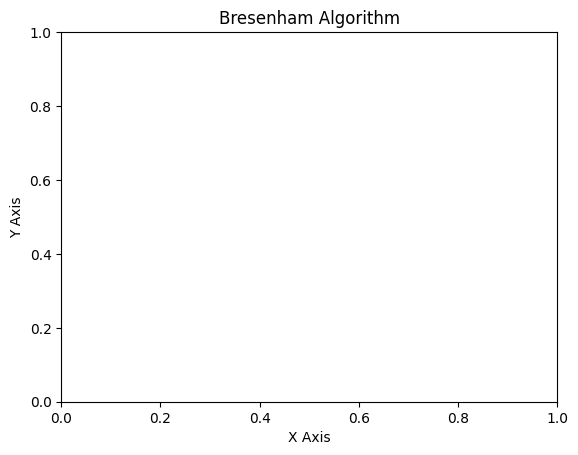

In [69]:
plt.title("Bresenham Algorithm")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Inside the bres function:

It initializes variables x and y to the starting point (x1, y1). Calculates the differences in x and y coordinates (dx and dy) between the two points and determines the gradient of the line. Checks if the slope of the line is greater than 1. If so, it swaps the x and y coordinates to handle steep slopes effectively.
Initializes the Bresenham error term p. Iterates through the line drawing algorithm, updating the coordinates x and y at each step and appending them to lists xcoordinates and ycoordinates. Creates a grid of zeros using numpy to represent the coordinates. Fills the grid with 1s at the calculated coordinates.
Displays the grid as an image using plt.imshow. The main function prompts the user to input the coordinates of the starting and ending points of the line.

Finally, the main function is called if the script is executed directly.

Here, is_steep variable is checking if the slope is greater than 1. If the slope > 1, then we are swapping the variables.

### Why are we swapping the variables?

When the slope of a line is greater than 1, it means that the line is more vertical than horizontal. In such cases, the standard Bresenham's algorithm may not perform optimally because it increments the x coordinate by 1 at each step. This can lead to a significant number of iterations required to cover the vertical distance between two points.

By exchanging the x and y values when the slope is greater than 1, we effectively rotate the coordinate system by 90 degrees, making the line less steep or more horizontal. This allows us to apply the Bresenham's algorithm more effectively since it is designed to efficiently draw lines with slopes between 0 and 1.

In [70]:
def bres(x1, y1, x2, y2):
    # Determine if the slope is steep
    is_steep = abs(y2 - y1) > abs(x2 - x1)

    # If the slope is steep, swap x and y coordinates
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    # Ensure the line is always drawn from left to right
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    dx = x2 - x1
    dy = abs(y2 - y1)
    error = dx / 2
    y_step = 1 if y1 < y2 else -1
    y = y1

    # Initialize the plotting points
    points = []

    for x in range(x1, x2 + 1):
        # Append points depending on the steepness of the slope
        points.append((y, x) if is_steep else (x, y))

        error -= dy
        if error < 0:
            y += y_step
            error += dx

    # Determine the size of the grid
    size_y = max(y1, y2) + 1 
    size_x = max(x1, x2) + 1 

    # Create a grid of zeros representing the coordinates
    grid = np.zeros((size_y, size_x))

    # Fill the grid with 1s at the coordinates
    for point in points:
        y, x = point
        if 0 <= y < size_y and 0 <= x < size_x:
            grid[y, x] = 1

    # Show the grid as an image with filled squares
    plt.imshow(grid, cmap='gray', origin='lower')

    # Add borders to the blocks
    for point in points:
        y, x = point
        if 0 <= y < size_y and 0 <= x < size_x:
            plt.plot([x - 0.5, x + 0.5, x + 0.5, x - 0.5, x - 0.5], 
                     [y - 0.5, y - 0.5, y + 0.5, y + 0.5, y - 0.5], color='black')

    plt.show()




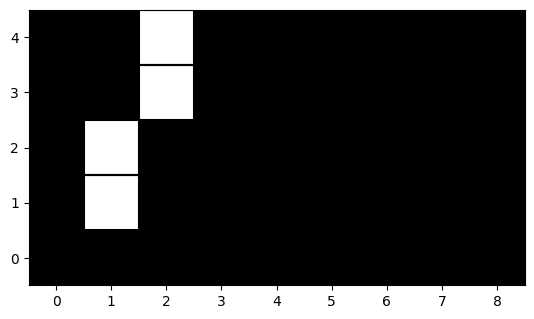

In [71]:
def main():
    x1 = 1
    y1 = 1
    x2 = 8
    y2 = 4

    bres(x1, y1, x2, y2)

if __name__ == "__main__":
    main()

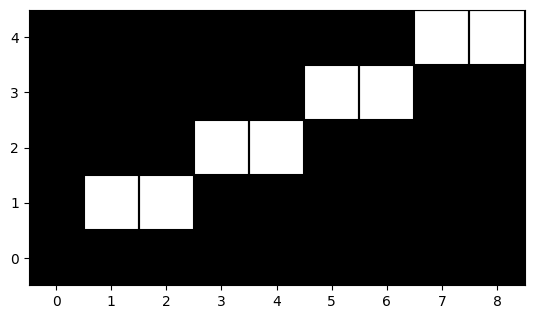

In [72]:
def main():
    x1 = 1
    y1 = 1
    x2 = 4
    y2 = 8

    bres(x1, y1, x2, y2)

if __name__ == "__main__":
    main()

We have to be cautious because after performing the calculations with the exchanged x and y values, we have to swap them back to obtain the correct pixel coordinates on the original line. This ensures that the line is drawn accurately on the display, maintaining its original orientation and position.